# Introduction


Stroke is a severe cerebrovascular disease caused by an interruption of blood flow from and to
the brain. As a direct consequence of this interruption, the brain is not able to receive oxygen
and nutrients for its correct functioning. The other way around, the brain is not able to drain and
expel through blood vessels all of its waste, like dead cells. In a question of minutes, the brain is
in a critical condition as brain cells will imminently begin to die.
The American Stroke Association indicates that stroke is the fifth cause of death and disability in
the United States. For this reason, stroke is considered a severe disease and has been the
subject of extensive research, not only in the medical field but also in data science and machine
learning studies.

Dataset Description 


The dataset used in this article contains 5110 records of patients. Each patient has 12 columns
each referring to a concrete attribute. Most of these attributes correspond to medical records or
the results of clinical trials. Some of the key attributes are hypertension, heart diseases, average
glucose levels in the blood, and body mass index (BMI). As we can observe from these first
attributes, the dataset provides relevant data regarding the likelihood of patients suffering from
stroke disease. It is easy to understand that a patient with high glucose levels and BMI, who has
suffered from heart diseases and/or hypertension, is more likely to suffer from stroke. In fact,
stroke is also an attribute in the dataset and indicates in each medical record if the patient
suffered from a stroke disease or not.

Data Dictionary -
a)Id - Unique Id
b)gender
c)age
d)hypertension - Binary Feature
e)Heart_disease - Binary Feature
f)Ever_married - Has the patient ever been married
g)Work_type - Work type of a patient
h)Residency_type - Residency type of patient
i)avg_glucose_level - Average Glucose level in the blood
j)bmi - Body mass Index
k)smoking_status - Smoking status of the patient
l)stroke - stroke event


Questions -


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

1. Read the dataset and view the first 10 rows of it.

In [78]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


2. Check the shape/dimension of the dataset


In [79]:
df.shape

(5110, 12)

3. Check for the missing values.Display number of missing values per column.


In [80]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

BMI has 201 null values

4. Investigate and predict the missing BMI Value.


In [81]:
df['bmi'].isnull().sum()


201

5. Check the datatype, number of non null values and name of each variable in the dataset.


In [82]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


6. Check the descriptive statistics of the dataset.


In [84]:
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


7. Visualize the proportion of Stroke samples in the dataset.


In [85]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<AxesSubplot:ylabel='stroke'>

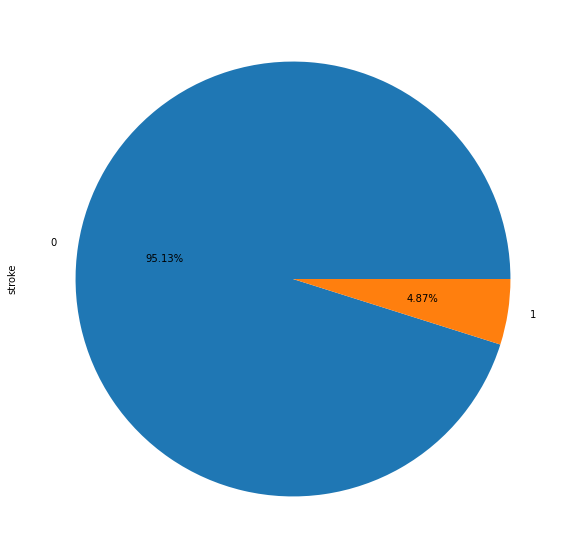

In [86]:
plt.figure(figsize=(15,10))
df['stroke'].value_counts().plot(kind='pie',autopct='%.2f%%')

Inference:95.13% dont have stroke,4.87% have stroke.

8. Visualize the Distribution of Male and Female Ages. Write the Observation.


<AxesSubplot:xlabel='age'>

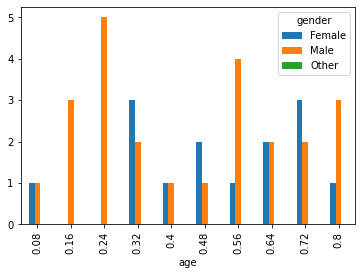

In [87]:
cc=pd.crosstab(df['age'],df['gender'])
cc.head(10).plot(kind='bar')

<AxesSubplot:xlabel='gender', ylabel='age'>

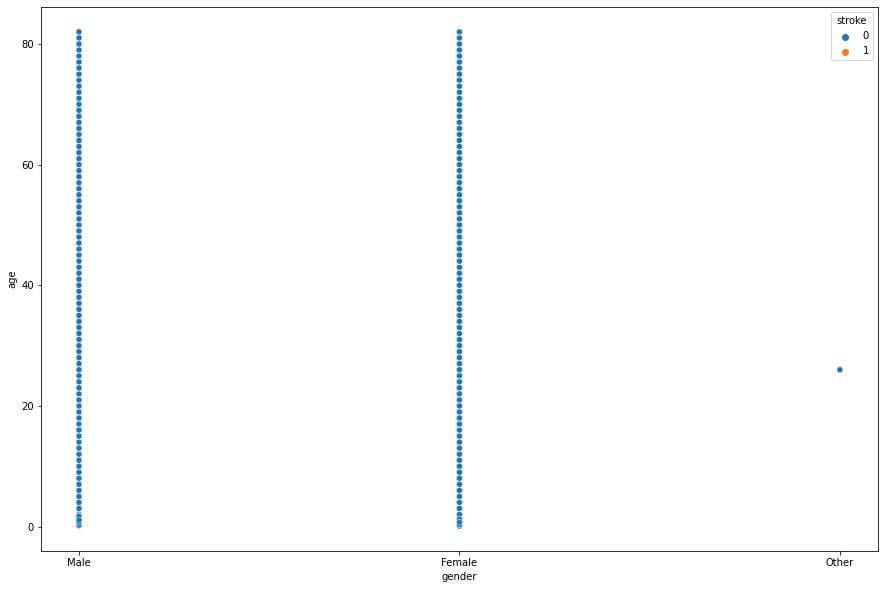

In [88]:

plt.figure(figsize=(15,10))
sns.scatterplot(data=df,x='gender',y='age',hue='stroke')

10.Visualize the stroke sample based on
a) BMI and Glucose Level
b) BMI and Age


BMI and Glucose Level

<AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>

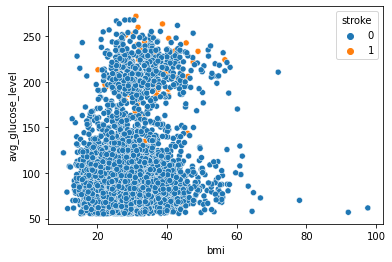

In [17]:
sns.scatterplot(x=df["bmi"],y=df["avg_glucose_level"],hue=df["stroke"])

BMI and Age

<AxesSubplot:xlabel='bmi', ylabel='age'>

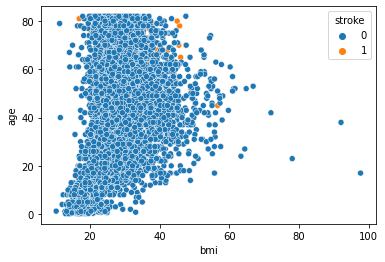

In [18]:
sns.scatterplot(x=df["bmi"],y=df["age"],hue=df["stroke"])

11. Using the pie chart visualizes the proportion of different smoking categories among the
stroke population.


array([<AxesSubplot:ylabel='0'>, <AxesSubplot:ylabel='1'>], dtype=object)

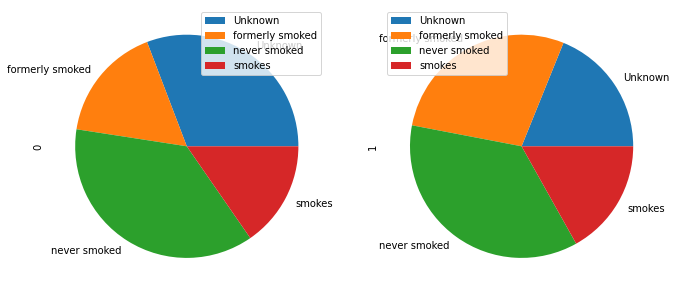

In [19]:
ss=pd.crosstab(df["smoking_status"],df["stroke"])
ss.plot.pie(subplots=True, figsize=(11, 6))

12. Perform hypothesis testing to find the significant variables.


# Numerical vs target

In [20]:
from scipy import stats


In [21]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [22]:
#null: id and stroke are independent
#alter:id and stroke are dependent

In [23]:
stat, p, dof, expected=stats.chi2_contingency(pd.crosstab(df['id'],df['stroke']))
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
# not significant

p value is 0.49342284623757243
Independent (H0 holds true)


In [24]:
#null: age and stroke are independent
#alter:age and stroke are dependent

In [25]:
stat, p, dof, expected=stats.chi2_contingency(pd.crosstab(df['age'],df['stroke']))
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
#significant

p value is 5.161745862440517e-52
Dependent (reject H0)


In [26]:
#null: hypertension and stroke are independent
#alter:hypertension and stroke are dependent

In [27]:
stat, p, dof, expected=stats.chi2_contingency(pd.crosstab(df['hypertension'],df['stroke']))
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
#significant

p value is 1.661621901511823e-19
Dependent (reject H0)


In [28]:
#null: heart_disease and stroke are independent
#alter:heart_disease and stroke are dependent

In [29]:
stat, p, dof, expected=stats.chi2_contingency(pd.crosstab(df['heart_disease'],df['stroke']))
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
#significant

p value is 2.0887845685229236e-21
Dependent (reject H0)


In [30]:
#null: avg_glucose_level and stroke are independent
#alter:avg_glucose_level and stroke are dependent

In [31]:
stat, p, dof, expected=stats.chi2_contingency(pd.crosstab(df['avg_glucose_level'],df['stroke']))
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
#significant

p value is 0.016045842421853904
Dependent (reject H0)


In [32]:
#null: bmi and stroke are independent
#alter:bmi and stroke are dependent

In [33]:
stat, p, dof, expected=stats.chi2_contingency(pd.crosstab(df['bmi'],df['stroke']))
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
#not significant

p value is 0.641453321954113
Independent (H0 holds true)


13. Drop the unnecessary columns.


In [34]:
# we can drop unneccesary columns by seeing the correaltion 
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [35]:
# The column id is redundant and not a predictor for stroke 
# so we can drop it
df.drop("id",axis=1,inplace=True)

In [36]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

14. Write the code to replace following categories columns in integer format as follow –
a) work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2)
 b) ever_married('Yes': 1, 'No': 0)
 c) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)


In [37]:
df["work_type"].replace({'Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2})
df["ever_married"].replace({'Yes': 1, 'No': 0})
df["smoking_status"].replace({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1})

0       2
1       0
2       0
3      -1
4       0
       ..
5105    0
5106    0
5107    0
5108    2
5109    1
Name: smoking_status, Length: 5110, dtype: int64

15. Check the distribution of 'bmi' and 'stroke' columns in the dataset.


<AxesSubplot:xlabel='bmi', ylabel='Density'>

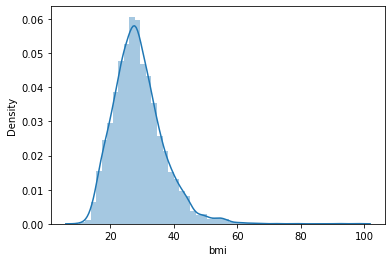

In [38]:
# bmi
sns.distplot(df["bmi"])

<AxesSubplot:xlabel='stroke', ylabel='Density'>

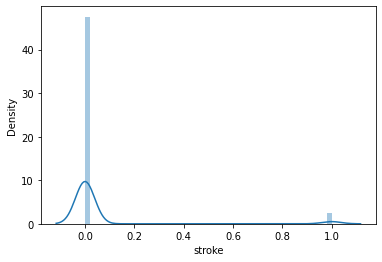

In [39]:
sns.distplot(df["stroke"])

16. List down columns that are highly skewed.


In [40]:
df.skew()

age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.055340
stroke               4.193284
dtype: float64

In [41]:
# we can say that heart disease and stroke are highly skewed

17. List down the columns that are highly kurtosis.


In [42]:
df.kurt()

age                  -0.991010
hypertension          5.375456
heart_disease        13.586052
avg_glucose_level     1.680479
bmi                   3.362659
stroke               15.589736
dtype: float64

In [43]:
# the columns stroke,heart disesase,hypertension are having high kurotsis

18. Find the distribution of all variables with respect to the outcome 'stroke' variable.


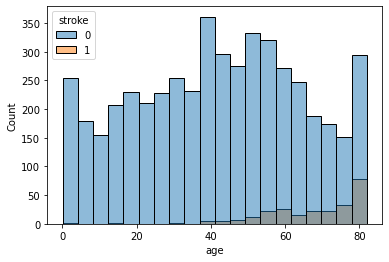

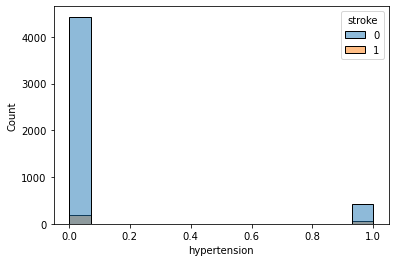

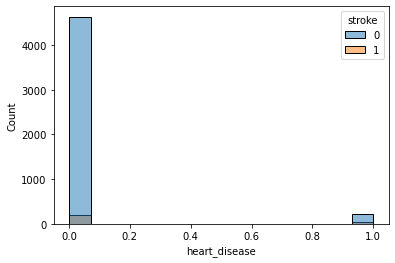

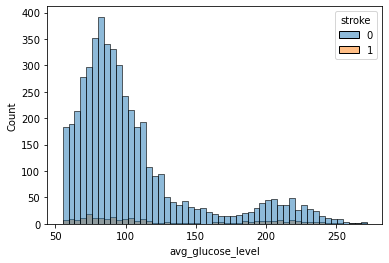

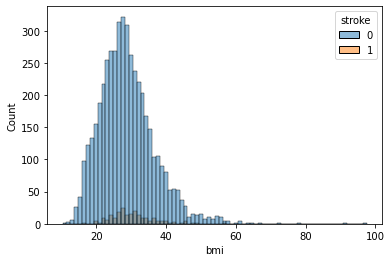

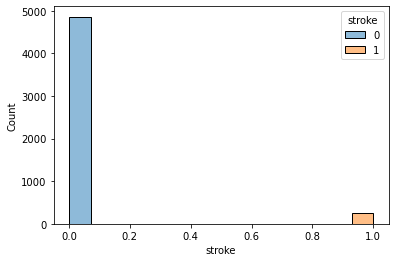

In [44]:
num = df.select_dtypes(exclude="object")
for i in num.columns:   
    sns.histplot(x=df[i],hue = df["stroke"])
    plt.show()

19. Plot the heatmap for correlation matrix for the given dataset. Write the observation.
Especially note down columns that are highly correlated (Positive or negative correlation,
consider 0.7 to 1 as high)


<AxesSubplot:>

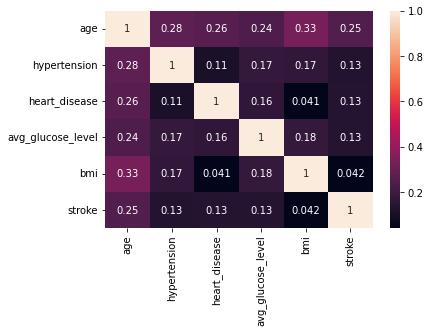

In [45]:
sns.heatmap(df.corr(),annot=True)

**None of the features are having strong correlation with the output variable**

20. Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio.


In [46]:
X=df.drop('stroke',axis=1)
y=df['stroke']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

21. Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach
to balanced the dataset by using the correct technique.


In [47]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()


In [48]:
gender=enc.fit_transform(df['gender'])
smoking_status=enc.fit_transform(df['smoking_status'])
work_type=enc.fit_transform(df['work_type'])
Residence_type=enc.fit_transform(df['Residence_type'])
ever_married=enc.fit_transform(df['ever_married'])

In [49]:
df['work_type']=work_type
df['ever_married']=ever_married
df['Residence_type']=Residence_type
df['smoking_status']=smoking_status
df['gender']=gender

In [50]:
df.dropna(axis=0,inplace=True)

In [51]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [52]:
from imblearn.over_sampling import SMOTE
X, y = df.iloc[:, 0:-1], df.iloc[:, -1:]

print("Before Oversampling, the counts of label 1: ", y.value_counts()[1])
print("Before Oversampling, the counts of label 0: ", y.value_counts()[0])

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

print("After Oversampling, the counts of label 1: ", y.value_counts()[1])
print("After Oversampling, the counts of label 0: ", y.value_counts()[0])

Before Oversampling, the counts of label 1:  209
Before Oversampling, the counts of label 0:  4700
After Oversampling, the counts of label 1:  4700
After Oversampling, the counts of label 0:  4700


22. Model Selection/hyperparameter tuning
- Try different models and fine tune their performance until you get the desired level of 
performance on the given dataset. 
 Model Evaluation 
- Evaluate the models using appropriate evaluation metrics

In [53]:
X=df.drop('stroke',axis=1)
y=df['stroke']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [54]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

In [57]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, precision_recall_curve, auc, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier


In [68]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: threadpoolctl>=2.0.0 in c:\users\sreerag\anaconda3\lib\site-packages (from scikit-learn) (2.2.0)



In [70]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


Model:  Logistic Regression
Validation Accuracy:  0.9511201629327902
Training Accuracy:  0.9604190919674039


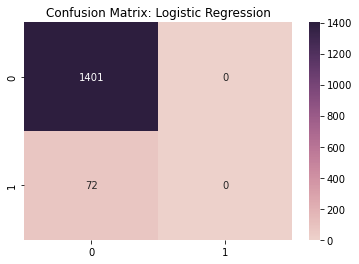

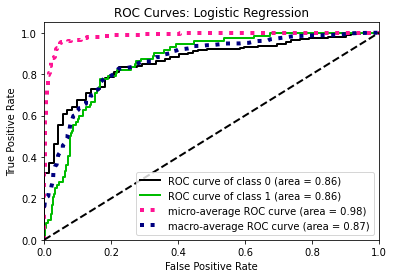

Model:  Decision Tree Classifier
Validation Accuracy:  0.9042769857433809
Training Accuracy:  1.0


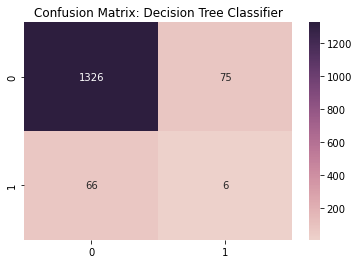

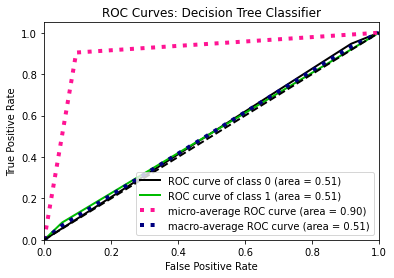

Model:  Random Forest
Validation Accuracy:  0.9517990495587237
Training Accuracy:  1.0


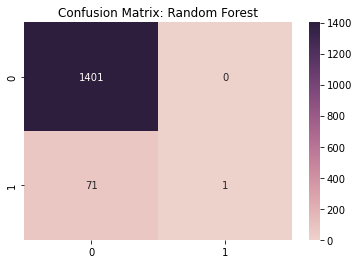

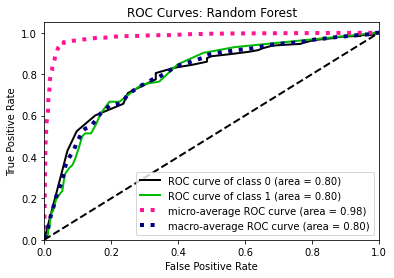

Model:  Ada Boost
Validation Accuracy:  0.9497623896809233
Training Accuracy:  0.9595459837019791


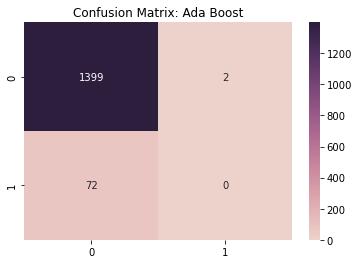

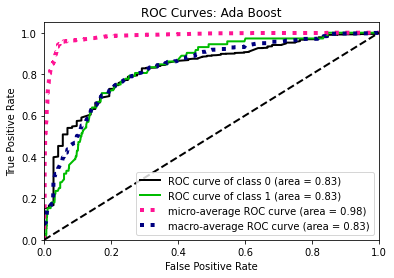

Model:  KNN
Validation Accuracy:  0.9497623896809233
Training Accuracy:  0.960710128055879


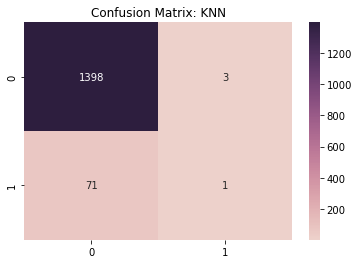

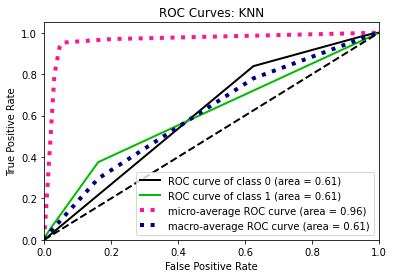

Model:  XG Boost
Validation Accuracy:  0.9470468431771895
Training Accuracy:  0.9973806752037253


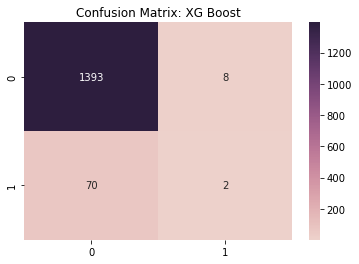

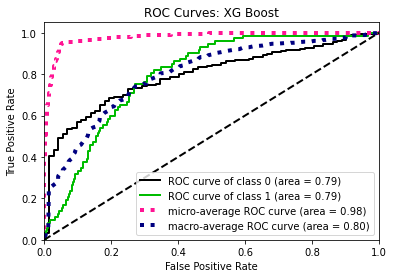

In [71]:
models = [('Logistic Regression', LogisticRegression()),
          ('Decision Tree Classifier', DecisionTreeClassifier()),
          ('Random Forest', RandomForestClassifier()),
          ('Ada Boost', AdaBoostClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('XG Boost', XGBClassifier())]

models_score = []
for name, model in models:
    model = model
    model.fit(X_train, y_train)
    model.predict(X_test)
    models_score.append([name, accuracy_score(y_test, model.predict(X_test))])
    
    print("Model: ",name)
    print('Validation Accuracy: ', accuracy_score(y_test, model.predict(X_test)))
    print('Training Accuracy: ', accuracy_score(y_train, model.predict(X_train)))
    
    plt.figure()
    cf_matrix = confusion_matrix(y_test, model.predict(X_test))
    plt.title('Confusion Matrix: {}'.format(name))
    sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
    plt.show()
    
    import scikitplot as skplt

    skplt.metrics.plot_roc(y_test, model.predict_proba(X_test))
    plt.title('ROC Curves: {}'.format(name))
    plt.show()

In [66]:
grid_models = [(LogisticRegression(),[{'C' : [0.3, 0.7, 1], 'random_state' : [42]}]),
               (DecisionTreeClassifier(),[{'criterion' : ['gini','entropy'], 'random_state' : [42]}]),
               (RandomForestClassifier(),[{'n_estimators' : [100, 200, 300], 'criterion' : ['gini','entropy'], 'random_state' : [42]}]),
               (AdaBoostClassifier(),[{'n_estimators' : [50, 100, 150], 'random_state' : [42]}]),
               (KNeighborsClassifier(),[{'n_neighbors' : [4, 6, 8, 10], 'metric' : ['euclidean', 'manhattan', 'chebyshev','minkowski']}]),
               (XGBClassifier(),[{'max_depth' : [3, 5, 7], 'min_child_weight' : [1, 3, 5]}])]

In [67]:
for model, param_grid  in grid_models:
    cv = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', cv = 5)
    cv.fit(X_train, y_train)
    best_accuracy = cv.best_score_
    best_params = cv.best_params_
    print('{}: \nBest Accuracy: {:.2f}%'.format(model, best_accuracy*100))
    print('Best Parameters: ',best_params)
    print('******************************')

LogisticRegression(): 
Best Accuracy: 96.07%
Best Parameters:  {'C': 0.7, 'random_state': 42}
******************************
DecisionTreeClassifier(): 
Best Accuracy: 92.26%
Best Parameters:  {'criterion': 'gini', 'random_state': 42}
******************************
RandomForestClassifier(): 
Best Accuracy: 96.01%
Best Parameters:  {'criterion': 'gini', 'n_estimators': 200, 'random_state': 42}
******************************
AdaBoostClassifier(): 
Best Accuracy: 95.93%
Best Parameters:  {'n_estimators': 50, 'random_state': 42}
******************************
KNeighborsClassifier(): 
Best Accuracy: 96.01%
Best Parameters:  {'metric': 'euclidean', 'n_neighbors': 6}
******************************
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=Non

As results we can easily determine that the random forest and XG boost algorithms give best scores after tuning.

Model:  Random Forest
Validation Accuracy:  0.9517990495587237
Training Accuracy:  0.9994179278230501


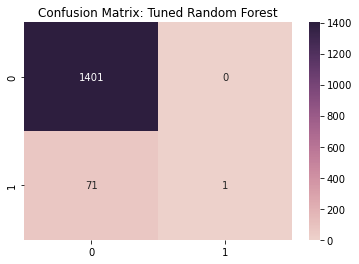

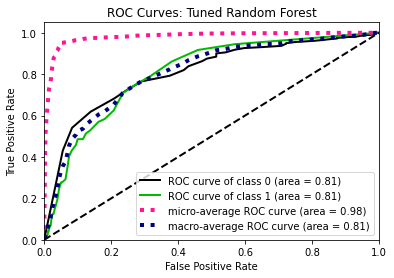

Feature: 0, Score: 0.03383
Feature: 1, Score: 0.21998
Feature: 2, Score: 0.02424
Feature: 3, Score: 0.02294
Feature: 4, Score: 0.01614
Feature: 5, Score: 0.05485
Feature: 6, Score: 0.03144
Feature: 7, Score: 0.28502
Feature: 8, Score: 0.24453
Feature: 9, Score: 0.06702


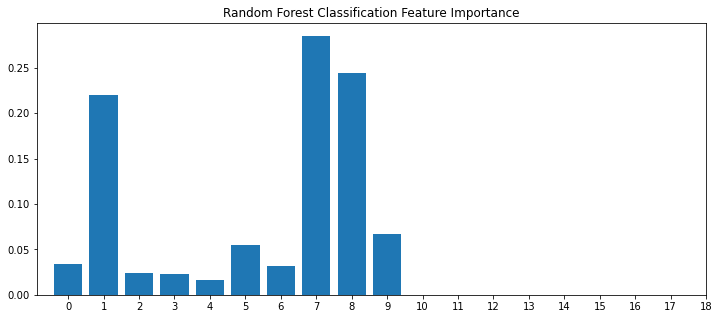


#######################################################
#######################################################
Model:  XG Boost
Validation Accuracy:  0.9477257298031229
Training Accuracy:  1.0


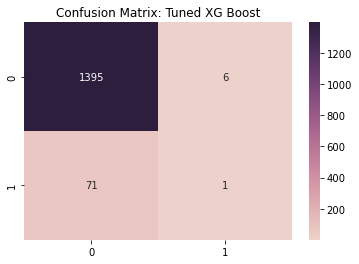

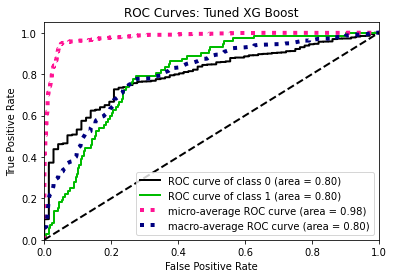

Feature: 0, Score: 0.08253
Feature: 1, Score: 0.15424
Feature: 2, Score: 0.10658
Feature: 3, Score: 0.12305
Feature: 4, Score: 0.07700
Feature: 5, Score: 0.10594
Feature: 6, Score: 0.09180
Feature: 7, Score: 0.08556
Feature: 8, Score: 0.08898
Feature: 9, Score: 0.08432


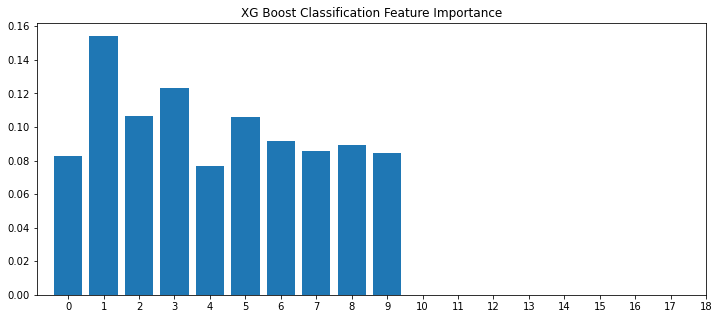


#######################################################
#######################################################


In [72]:
# The best two models with the best chosen parameters after tuning
models = [('Random Forest', RandomForestClassifier(criterion = 'gini', n_estimators = 100, random_state = 42)),
          ('XG Boost', XGBClassifier(max_depth = 7, min_child_weight = 1))]

models_score = []
for name, model in models:
    model = model
    model.fit(X_train, y_train)
    model.predict(X_test)
    models_score.append([name, accuracy_score(y_test, model.predict(X_test))])
    print("Model: ",name)
    print('Validation Accuracy: ', accuracy_score(y_test, model.predict(X_test)))
    print('Training Accuracy: ', accuracy_score(y_train, model.predict(X_train)))
    
    plt.figure()
    cf_matrix = confusion_matrix(y_test, model.predict(X_test))
    plt.title('Confusion Matrix: Tuned {}'.format(name))
    sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
    plt.show()
    
    import scikitplot as skplt

    skplt.metrics.plot_roc(y_test, model.predict_proba(X_test))
    plt.title('ROC Curves: Tuned {}'.format(name))
    plt.show()
    
    importance = model.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    plt.figure(figsize = (12, 5))
    plt.bar([x for x in range(len(importance))], importance)
    plt.title("{} Classification Feature Importance".format(name))
    plt.xticks(range(0, 19))
    plt.show()
    print('')
    print('#######################################################')
    print('#######################################################')